In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# seeing the data
data = pd.read_csv("final_data7.csv")
print(data.shape)
# data.head()
data.keys()
data = data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','url'],axis=1)

(1819, 29)


In [3]:
#lets check whether the dataset is imbalance
print(data.keys())
data["label"].value_counts()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


good    1598
bad      221
Name: label, dtype: int64

The dataset is highly imbalanced. Only 221 datapoints are malicious or phishing. i.e. only 12% of the data has class label 1

## Feature exploration
#### 1. URL_LENGTH

Number of unique values in URL_LENGTH 135
mean of URL_LENGTH 47.843320505772404


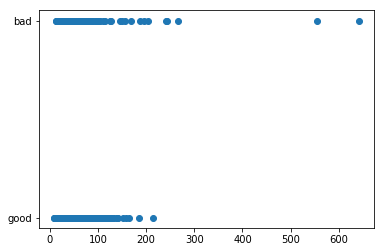

In [4]:
print("Number of unique values in URL_LENGTH",len(data["url_length"].value_counts()))
print("mean of URL_LENGTH",data["url_length"].mean())
plt.scatter(data["url_length"], data["label"])
plt.show()

In [5]:
#from the above plot we can see that if the length of the url is greater than 170, very few are good urls
#lets check that stats
length_greater_170 = data[data["url_length"] > 170]
print(length_greater_170.shape)
print(length_greater_170["label"].value_counts())

(10, 24)
bad     8
good    2
Name: label, dtype: int64


If the URL_LENGTH is too large then the chances of that website being suspicious is high

#### 2. NUMBER OF SPECIAL CHARACTERS

Number of unique special characters: 29
mean of NUMBER OF SPECIAL CHARACTERS 6.155579989004948


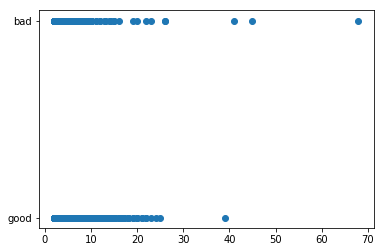

In [6]:
print("Number of unique special characters:", len(data["special_character_count"].value_counts()))
print("mean of NUMBER OF SPECIAL CHARACTERS",data["special_character_count"].mean())
plt.scatter(data["special_character_count"], data["label"])
plt.show()

In [7]:
#from the above plot we can see that if the NUMBER OF SPECIAL CHARACTERS is greater than 25, very few are good urls
#lets check that stats
SPCL_CHARS_25 = data[data["special_character_count"] > 25]
print(SPCL_CHARS_25.shape)
print(SPCL_CHARS_25["label"].value_counts())

(6, 24)
bad     5
good    1
Name: label, dtype: int64


If the number of special characters in an url is more than 25, most of cases the url turns out not to be good

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


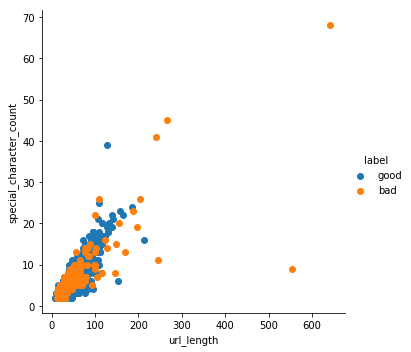

In [8]:
#lets check how these two feature together behaves with the class label
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "url_length", "special_character_count") \
   .add_legend()
plt.show()

1. One thing to be noticed here is, if the URL_LENGTH is greater than 150 and NUMBER OF SPECIAL CHARACTERS is between 15 to 20, then the website is not legitimate.
2. Also, if the URL LENGTH is greater than 120 and NUMBER OF SPECIAL CHARACTERS is between 22 to 30, a remarkable number of malicious url are there.
Lets check that stats

In [9]:
data_120 = data[data["url_length"] > 100]
data_160 = data_120[data_120["url_length"] < 600]
data_22 = data_160[data_160["special_character_count"] > 22 ]
data_30 = data_22[data_22["special_character_count"] <= 30]
np.unique(data_30["label"],return_counts=True)

(array(['bad', 'good'], dtype=object), array([3, 3]))

We can see that,
>if url_length > 100 && url_length < 600 && number of character > 22 && number of characters < 30:
>>                "50 percent of time the url is malicious"

#### 3. HAVING IP ADDRESS

In [10]:
print(data.keys())
print("unique values:")
data["having_ip_address"].value_counts()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')
unique values:


0    1802
1      17
Name: having_ip_address, dtype: int64

In [11]:
temp1 = data[data["label"]=='good']
temp2 = data[data["label"]=='bad']
temp1_no_ip  = temp1[temp1["having_ip_address"]==0]
temp1_ip  = temp1[temp1["having_ip_address"]==1]
temp2_no_ip  = temp2[temp2["having_ip_address"]==0]
temp2_ip  = temp2[temp2["having_ip_address"]==1]
print("GOOD WITH IP : ",temp1_ip.shape[0])
print("BAD WITH IP : ",temp2_ip.shape[0])
print("GOOD WITHOUT IP : ",temp1_no_ip.shape[0])
print("BAD WITHOUT IP : ",temp2_no_ip.shape[0])

GOOD WITH IP :  1
BAD WITH IP :  16
GOOD WITHOUT IP :  1597
BAD WITHOUT IP :  205


Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


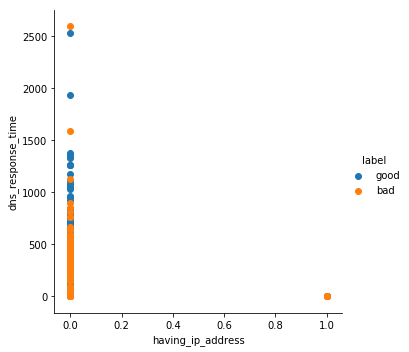

In [12]:
print(data.keys())
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "dns_response_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


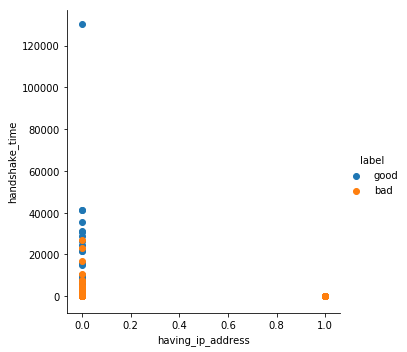

In [13]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "handshake_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


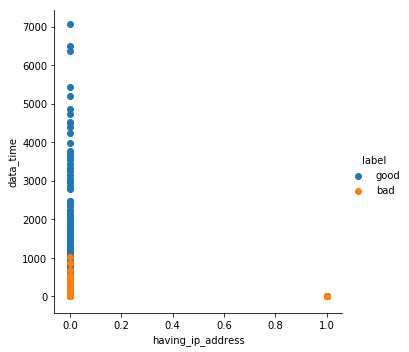

In [14]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "data_time") \
   .add_legend()
plt.show()

/home/rajneesh/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


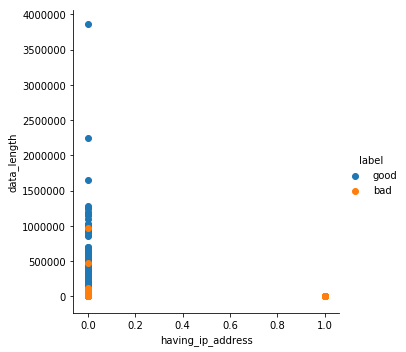

In [15]:
sns.FacetGrid(data, hue="label", size=5) \
   .map(plt.scatter, "having_ip_address", "data_length") \
   .add_legend()
plt.show()

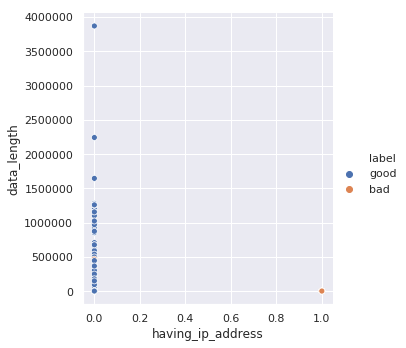

In [16]:
import seaborn as sns

sns.set(style="darkgrid")
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(data)

sns.relplot(x="having_ip_address", y="data_length",hue='label', data=data)

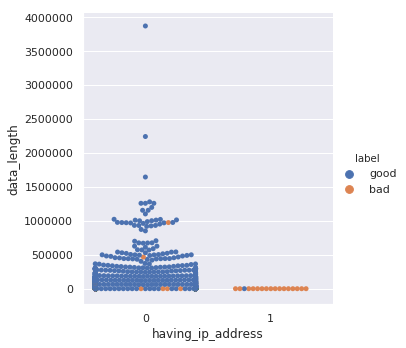

In [17]:
tips = data
sns.catplot(x="having_ip_address", y="data_length",hue='label',kind="swarm", data=tips);

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')


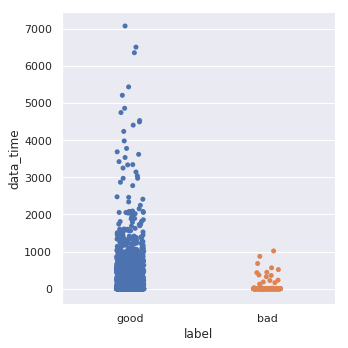

In [18]:
## data time
print(data.keys())
sns.catplot(y="data_time", x='label', data=tips);

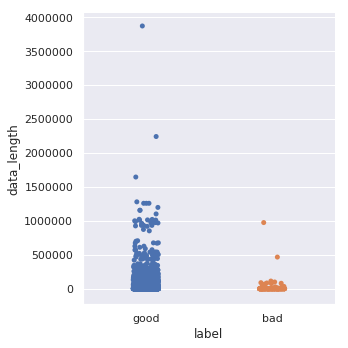

In [19]:
## data length
sns.catplot(y="data_length", x='label', data=tips);

In [20]:
data_true = data[data["label"]=="good"]
data_bad = data[data["label"]=="bad"]
data_true_len = data_true[data_true["data_length"]>1000000]

we here observe that with increasing value of length of data more and more of the urls are of good type and less are malignant.

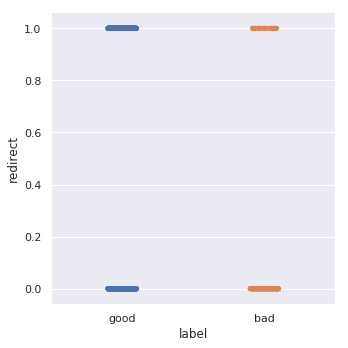

In [21]:
# redirect
sns.catplot(y="redirect", x='label', data=tips);

In [22]:
data_120 = data[data["redirect"] ==1]
data_160 = data[data["redirect"] ==0]


print("data with redirect true : "  , data_120["label"].value_counts())
print("data with redirect false : "  , data_160["label"].value_counts())



data with redirect true :  good    600
bad      23
Name: label, dtype: int64
data with redirect false :  good    974
bad     194
Name: label, dtype: int64


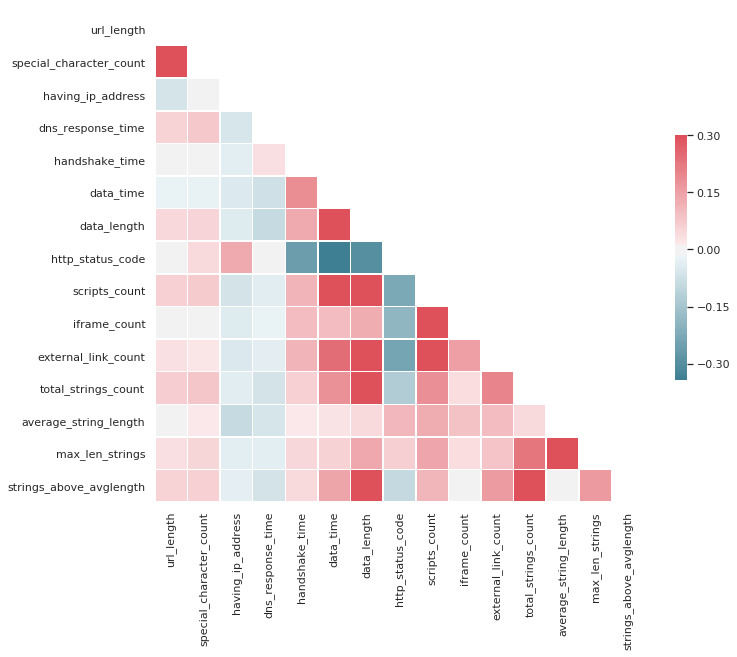

In [23]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = data
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).get_figure().savefig("temp.png")

/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


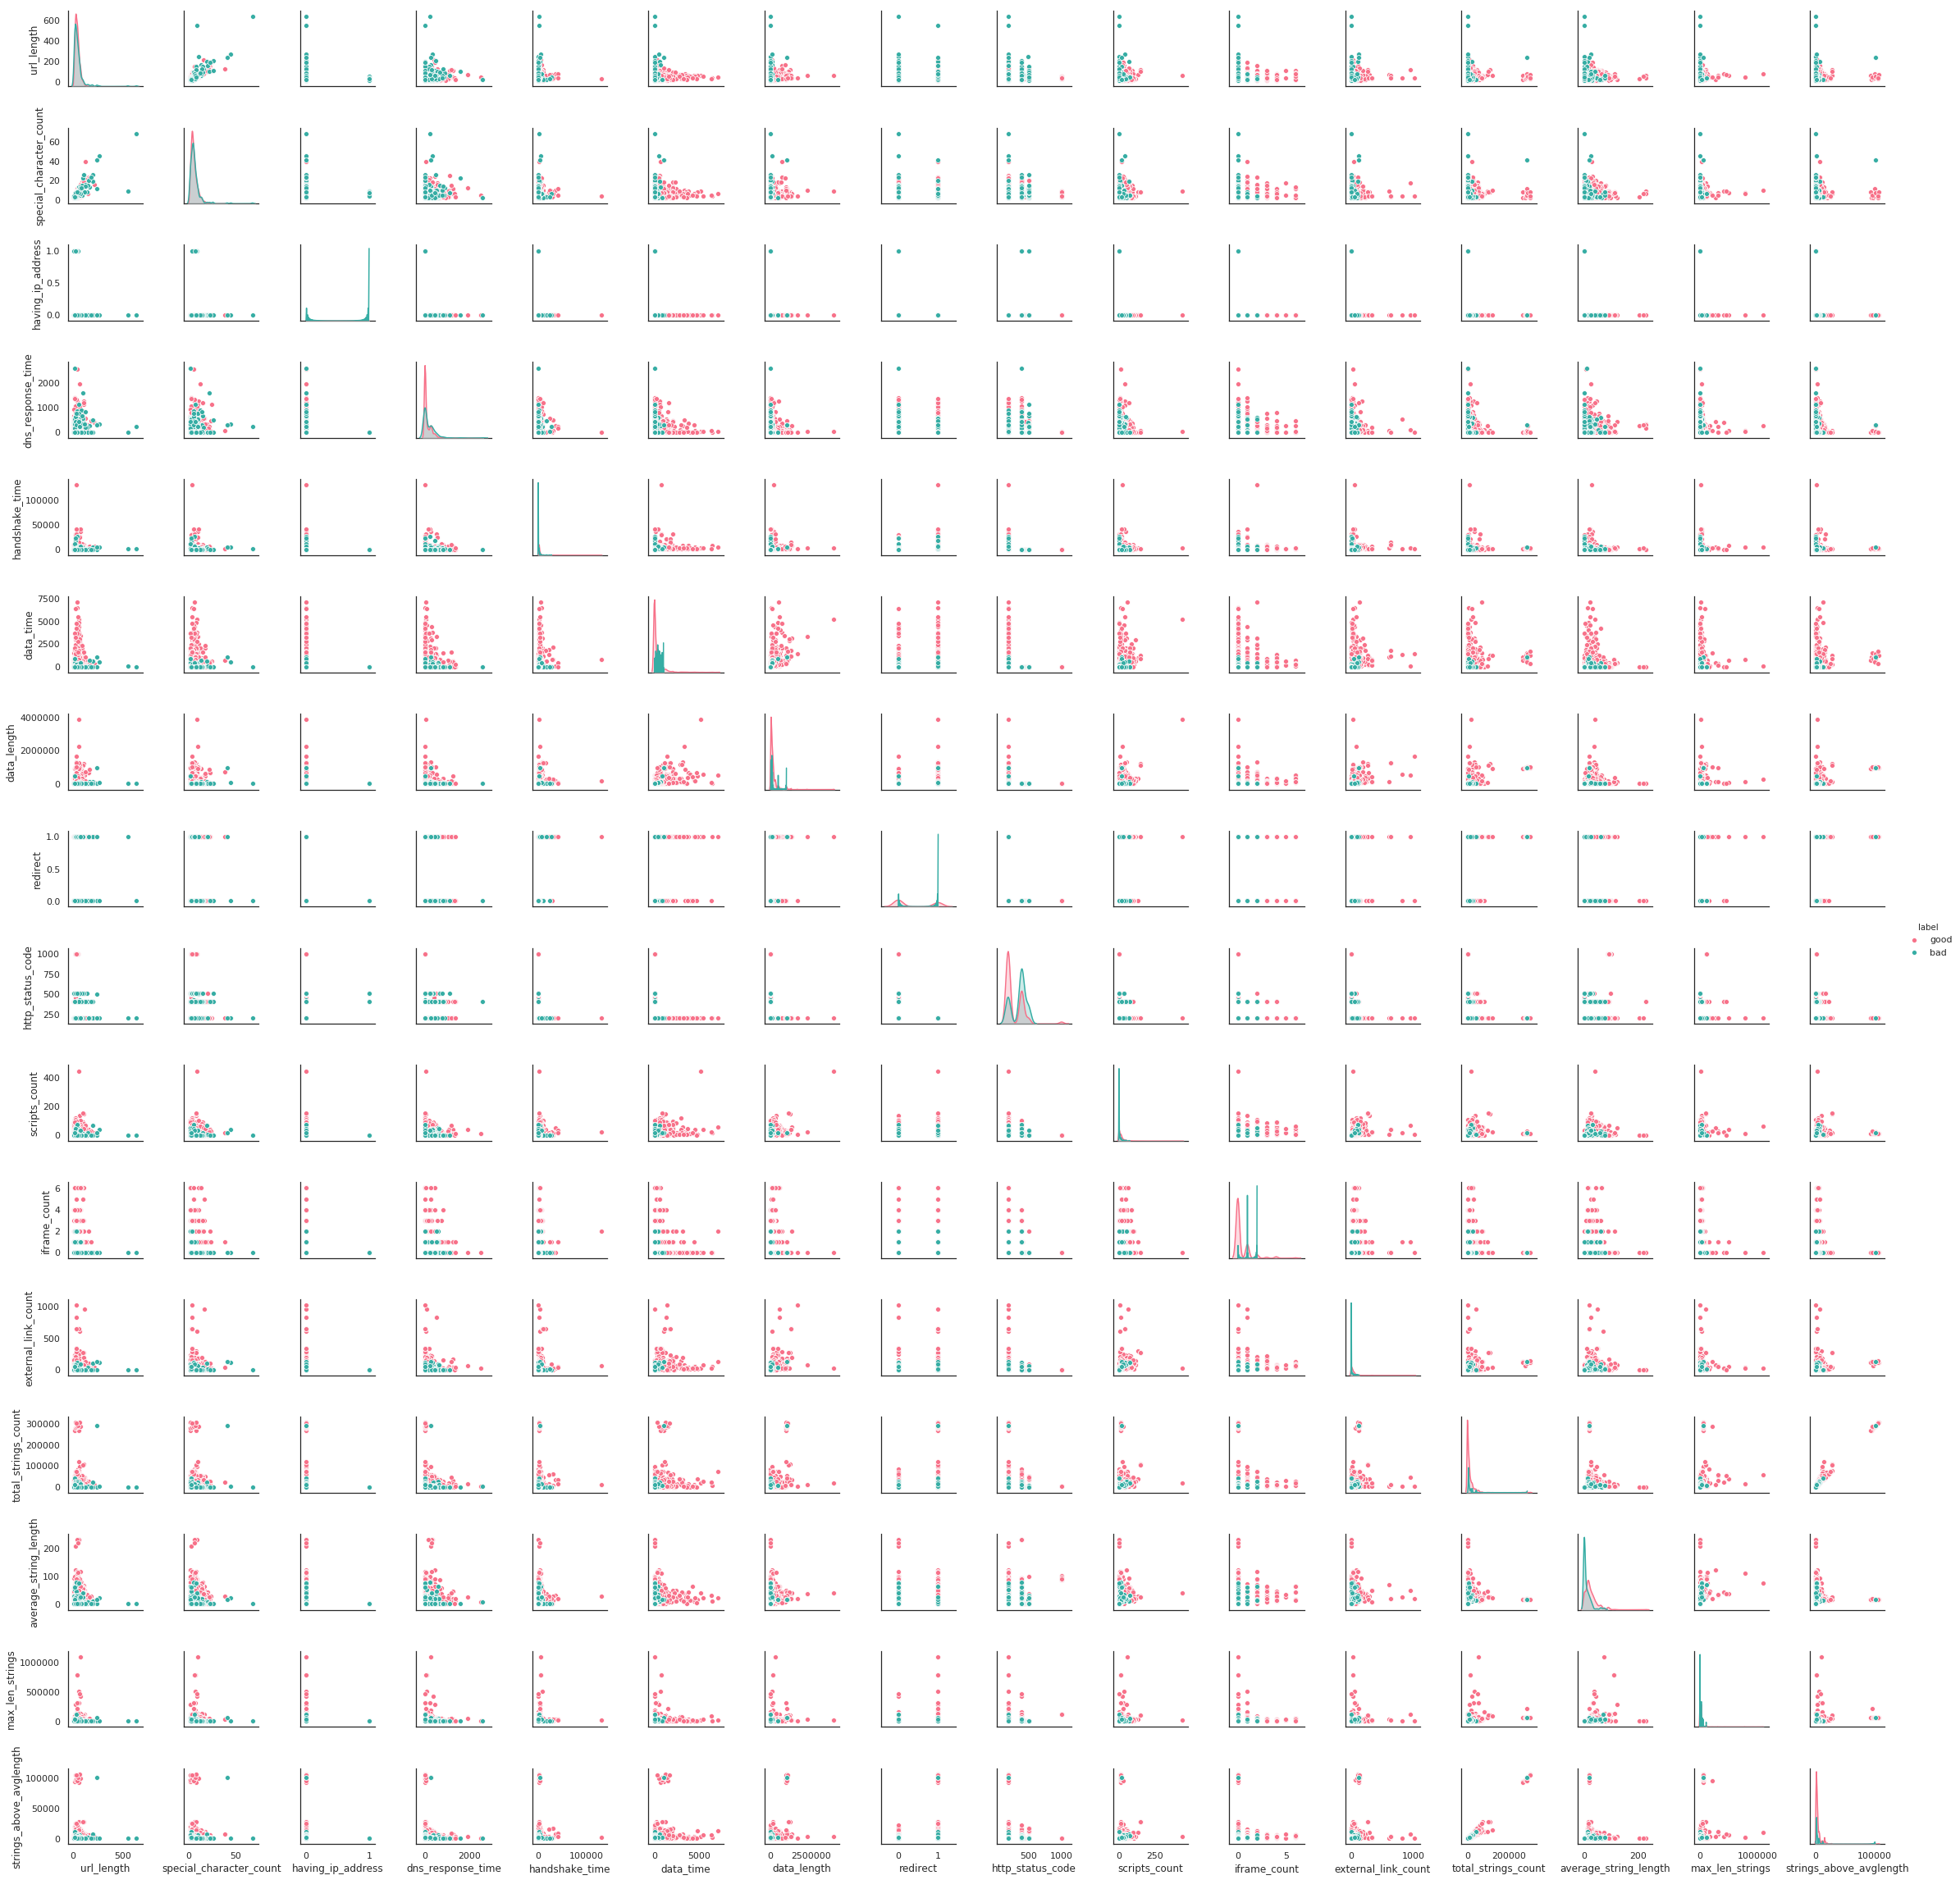

In [24]:
g = sns.pairplot(data, hue="label", palette="husl",height=2,aspect=1)

In [25]:
g.savefig("pairplot.png")

In [26]:
data.keys()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')

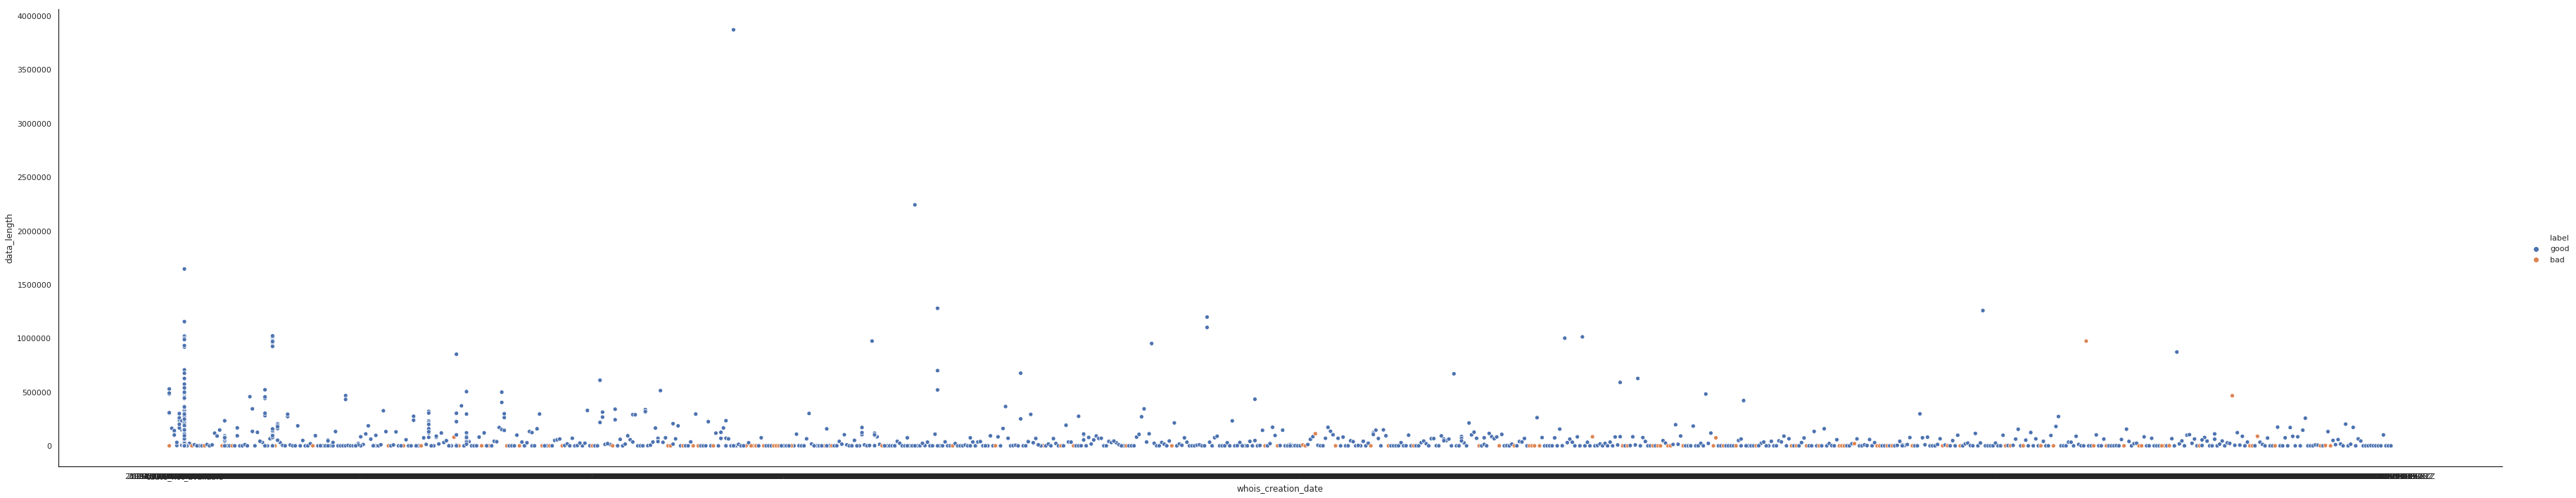

In [27]:
sns.relplot(x="whois_creation_date", y="data_length",hue='label', data=data, height=10, aspect=5).savefig("whois_date.png")

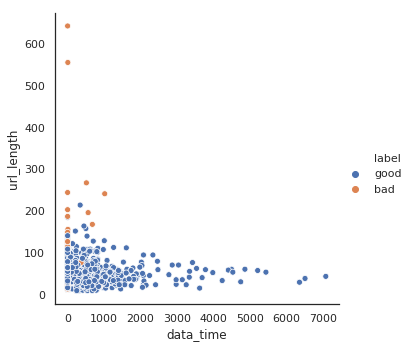

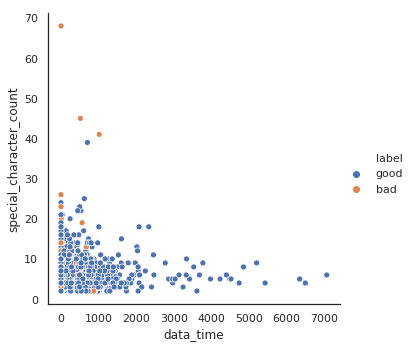

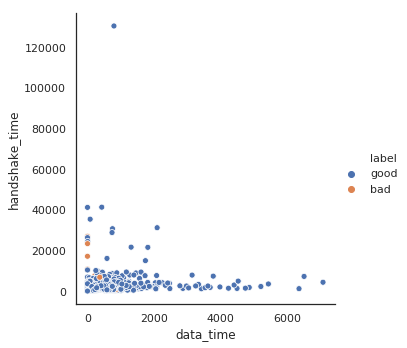

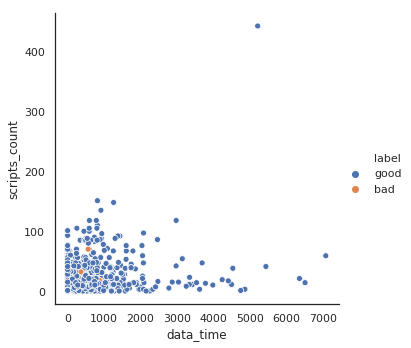

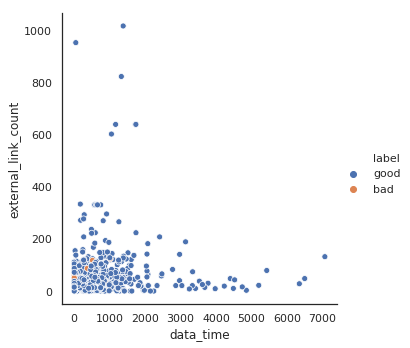

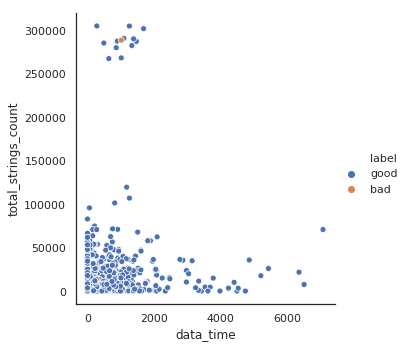

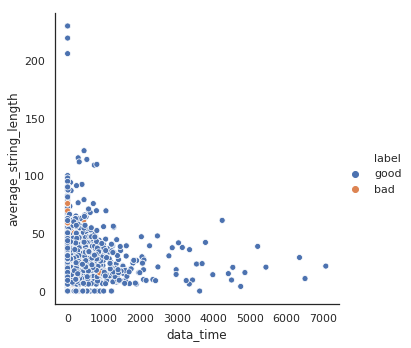

In [28]:
#from pairplot it is evident that facet grid has a lot of relation with other columns
sns.relplot(y="url_length", x='data_time',hue="label", data=data).savefig("url_len_dt.png")
sns.relplot(y="special_character_count", x='data_time',hue="label", data=data).savefig("s_c_c_dt.png")
sns.relplot(y="handshake_time", x='data_time',hue="label", data=data).savefig("s_c_c_dt.png")
sns.relplot(y="scripts_count", x='data_time',hue="label", data=data).savefig("s_c_dt.png")
sns.relplot(y="external_link_count", x='data_time',hue="label", data=data).savefig("e_l_c_dt.png")
sns.relplot(y="total_strings_count", x='data_time',hue="label", data=data).savefig("t_s_c_dt.png")
sns.relplot(y="average_string_length", x='data_time',hue="label", data=data).savefig("a_s_l_dt.png")


when url_length is less and data_time is more, there is less portion of bad and more portion of good
there should be less special character count in a benign link


In [29]:
data.keys()

Index(['label', 'url_length', 'special_character_count', 'having_ip_address',
       'dns_response_time', 'handshake_time', 'data_time', 'data_length',
       'redirect', 'protocol', 'http_status_code', 'server_name',
       'scripts_count', 'iframe_count', 'external_link_count',
       'total_strings_count', 'average_string_length', 'max_len_strings',
       'strings_above_avglength', 'whois_creation_date', 'whois_expiry_date',
       'whois_last_updated', 'whois_country', 'whois_city'],
      dtype='object')

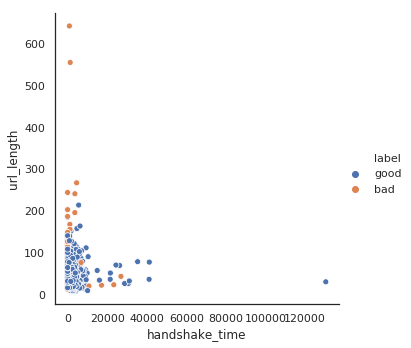

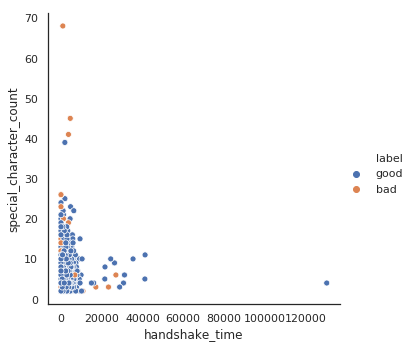

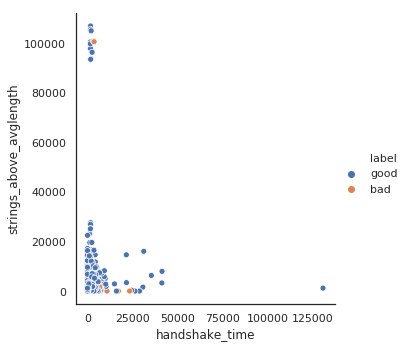

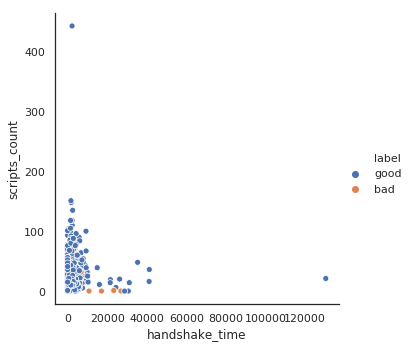

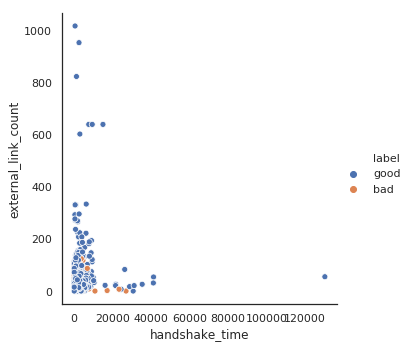

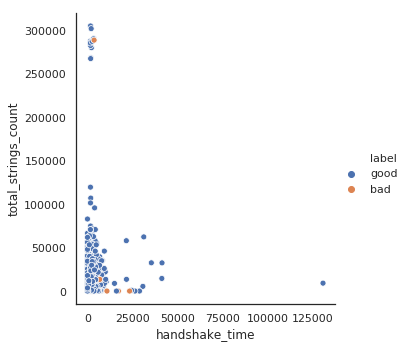

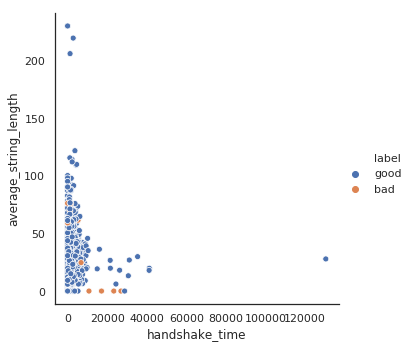

In [30]:
sns.relplot(y="url_length", x='handshake_time',hue="label", data=data).savefig("url_len_ht.png")
sns.relplot(y="special_character_count", x='handshake_time',hue="label", data=data).savefig("s_c_c_ht.png")
sns.relplot(y="strings_above_avglength", x='handshake_time',hue="label", data=data).savefig("s_a_a_ht.png")
sns.relplot(y="scripts_count", x='handshake_time',hue="label", data=data).savefig("s_c_ht.png")
sns.relplot(y="external_link_count", x='handshake_time',hue="label", data=data).savefig("e_l_c_ht.png")
sns.relplot(y="total_strings_count", x='handshake_time',hue="label", data=data).savefig("t_s_c_ht.png")
sns.relplot(y="average_string_length", x='handshake_time',hue="label", data=data).savefig("a_s_l_ht.png")

(array(['bad', 'good'], dtype=object), array([  58, 1010]))


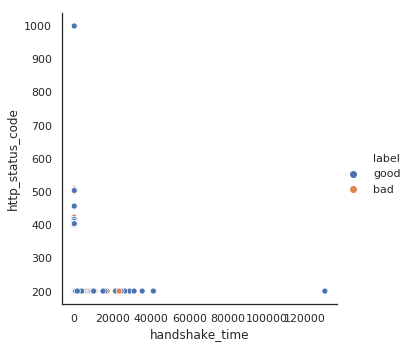

In [31]:
sns.relplot(y="http_status_code", x='handshake_time',hue="label", data=data)
temp = data[data["http_status_code"]==200]
print(np.unique(temp["label"],return_counts=True))

In [32]:
# data = data.dropna()
values = data["http_status_code"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["http_status_code"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
203.0
bad    1
Name: label, dtype: int64
400.0
good    2
bad     1
Name: label, dtype: int64
401.0
bad    1
Name: label, dtype: int64
402.0
bad    1
Name: label, dtype: int64
403.0
good    181
bad      18
Name: label, dtype: int64
404.0
good    256
bad      96
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)

In [33]:
values = data["scripts_count"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["scripts_count"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    274
bad     134
Name: label, dtype: int64
1.0
good    116
bad      13
Name: label, dtype: int64
2.0
good    55
bad      8
Name: label, dtype: int64
3.0
good    51
bad      6
Name: label, dtype: int64
4.0
good    71
bad      1
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
5.0
good    17
bad      1
Name: label, dtype: int64
6.0
good    61
bad      5
Name: label, dtype: int64
7.0
good    45
bad      9
Name: label, dtype: int64
8.0
good    32
bad      1
Name: label, dtype: int64
9.0
good    28
bad      3
Name: label, dtype: int64
10.0
good    46
bad      2
Name: label, dtype: int64
11.0
good    60
bad      2
Name: label, dtype: int64
12.0
good    41
bad      5
Name: label, dtype: int64
13.0
good    29
Name: label, dtype: int64
14.0
good    48
bad      1
Name: label, dtype: int64
15.0
good    55
bad      2
Name: label, dtype: int64
16.0
good    36
bad      4
Name: label, dtype: int64
17.0
good    32
Name: label, dtype: int64
18.0
good    20
bad      3
Name:

In [34]:
values = data["iframe_count"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["iframe_count"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    1176
bad      201
Name: label, dtype: int64
1.0
good    272
bad      10
Name: label, dtype: int64
2.0
good    70
bad      4
Name: label, dtype: int64
3.0
good    19
Name: label, dtype: int64
4.0
good    29
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
6.0
good    9
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
5.0
good    2
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
nan


In [35]:
values = data["external_link_count"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["external_link_count"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    292
bad     121
Name: label, dtype: int64
1.0
good    55
bad     18
Name: label, dtype: int64
2.0
good    32
bad      7
Name: label, dtype: int64
3.0
good    46
bad      7
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
4.0
good    13
bad      5
Name: label, dtype: int64
5.0
good    24
bad      2
Name: label, dtype: int64
6.0
good    7
bad     2
Name: label, dtype: int64
7.0
good    20
bad      3
Name: label, dtype: int64
8.0
good    19
bad      6
Name: label, dtype: int64
9.0
good    16
bad      2
Name: label, dtype: int64
10.0
good    30
bad      1
Name: label, dtype: int64
11.0
good    18
bad      3
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
12.0
good    21
Name: label, dtype: int64
13.0
good    45
bad      1
Name: label, dtype: int64
14.0
good    27
bad      1
Name: label, dtype: int64
15.0
good    24
bad      1
Name: label, dtype: int64
16.0
good    21
bad      2
Name: label, dtype: int64
17.0
good    20
bad      1
Name: lab

In [36]:
values = data["total_strings_count"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["total_strings_count"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    228
bad     127
Name: label, dtype: int64
1.0
good    9
Name: label, dtype: int64
2.0
good    12
Name: label, dtype: int64
3.0
good    7
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
4.0
good    3
bad     2
Name: label, dtype: int64
5.0
good    3
Name: label, dtype: int64
6.0
good    6
bad     1
Name: label, dtype: int64
7.0
good    1
Name: label, dtype: int64
8.0
good    1
Name: label, dtype: int64
9.0
good    5
bad     1
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
10.0
bad    1
Name: label, dtype: int64
11.0
good    1
bad     1
Name: label, dtype: int64
12.0
good    1
Name: label, dtype: int64
13.0
good    5
Name: label, dtype: int64
14.0
good    6
Name: label, dtype: int64
15.0
good    2
Name: label, dtype: int64
18.0
good    30
bad      2
Name: label, dtype: int64
20.0
good    6
bad     4
Name: label, dtype: int64
21.0
good    2
bad     1
Name: label, dtype: int64
24.0
good    1
Name: label, dtype: int64
25.0
good    1
Name:

good    4
bad     2
Name: label, dtype: int64
1813.0
good    1
Name: label, dtype: int64
1829.0
good    1
Name: label, dtype: int64
1875.0
bad    1
Name: label, dtype: int64
1906.0
good    1
Name: label, dtype: int64
1949.0
good    1
Name: label, dtype: int64
1963.0
good    1
Name: label, dtype: int64
1964.0
good    2
Name: label, dtype: int64
1998.0
good    1
Name: label, dtype: int64
2000.0
bad    1
Name: label, dtype: int64
2043.0
good    1
Name: label, dtype: int64
2059.0
good    1
Name: label, dtype: int64
2067.0
good    1
Name: label, dtype: int64
2079.0
good    1
Name: label, dtype: int64
2104.0
good    1
Name: label, dtype: int64
2111.0
bad    1
Name: label, dtype: int64
2142.0
good    1
Name: label, dtype: int64
2166.0
good    1
Name: label, dtype: int64
2199.0
good    18
Name: label, dtype: int64
2207.0
good    1
Name: label, dtype: int64
2215.0
good    3
Name: label, dtype: int64
2240.0
good    1
Name: label, dtype: int64
2253.0
good    1
Name: label, dtype: int64
2297.0
bad

5427.0
good    1
Name: label, dtype: int64
5436.0
good    1
Name: label, dtype: int64
5462.0
good    1
Name: label, dtype: int64
5485.0
good    1
Name: label, dtype: int64
5486.0
good    1
Name: label, dtype: int64
5506.0
good    1
Name: label, dtype: int64
5511.0
good    1
Name: label, dtype: int64
5527.0
good    1
Name: label, dtype: int64
5546.0
good    1
Name: label, dtype: int64
5547.0
good    1
Name: label, dtype: int64
5567.0
good    1
Name: label, dtype: int64
5572.0
good    1
Name: label, dtype: int64
5579.0
good    1
Name: label, dtype: int64
5589.0
good    2
Name: label, dtype: int64
5593.0
good    1
Name: label, dtype: int64
5602.0
good    2
Name: label, dtype: int64
5615.0
good    1
Name: label, dtype: int64
5649.0
good    2
Name: label, dtype: int64
5658.0
good    1
Name: label, dtype: int64
5667.0
good    1
Name: label, dtype: int64
5764.0
good    1
Name: label, dtype: int64
5819.0
good    1
Name: label, dtype: int64
5839.0
good    1
Name: label, dtype: int64
5872.0
good

good    1
Name: label, dtype: int64
8889.0
good    1
Name: label, dtype: int64
8914.0
good    3
Name: label, dtype: int64
8922.0
good    1
Name: label, dtype: int64
8930.0
good    1
Name: label, dtype: int64
8933.0
good    1
Name: label, dtype: int64
8937.0
good    1
Name: label, dtype: int64
8954.0
good    1
Name: label, dtype: int64
9008.0
good    1
Name: label, dtype: int64
9057.0
good    1
Name: label, dtype: int64
9075.0
good    1
Name: label, dtype: int64
9089.0
good    1
Name: label, dtype: int64
9141.0
good    1
Name: label, dtype: int64
9164.0
good    1
Name: label, dtype: int64
9201.0
good    1
Name: label, dtype: int64
9229.0
good    1
Name: label, dtype: int64
9243.0
good    1
Name: label, dtype: int64
9246.0
good    1
Name: label, dtype: int64
9253.0
good    1
Name: label, dtype: int64
9279.0
good    1
Name: label, dtype: int64
9289.0
good    1
Name: label, dtype: int64
9306.0
good    1
Name: label, dtype: int64
9315.0
good    1
Name: label, dtype: int64
9331.0
good    2
N

good    1
Name: label, dtype: int64
17482.0
good    1
Name: label, dtype: int64
17622.0
good    1
Name: label, dtype: int64
17717.0
good    1
Name: label, dtype: int64
17726.0
good    1
Name: label, dtype: int64
17759.0
good    1
Name: label, dtype: int64
17801.0
good    1
Name: label, dtype: int64
17807.0
good    1
Name: label, dtype: int64
17872.0
bad    1
Name: label, dtype: int64
17938.0
good    1
Name: label, dtype: int64
18000.0
good    1
Name: label, dtype: int64
18086.0
good    1
Name: label, dtype: int64
18088.0
good    2
Name: label, dtype: int64
18095.0
good    1
Name: label, dtype: int64
18138.0
good    1
Name: label, dtype: int64
18249.0
good    1
Name: label, dtype: int64
18291.0
good    1
Name: label, dtype: int64
18444.0
good    1
Name: label, dtype: int64
18488.0
good    1
Name: label, dtype: int64
18489.0
good    1
Name: label, dtype: int64
18514.0
good    1
Name: label, dtype: int64
18521.0
good    1
Name: label, dtype: int64
18564.0
good    1
Name: label, dtype: int

Name: label, dtype: int64
36378.0
good    1
Name: label, dtype: int64
36443.0
good    1
Name: label, dtype: int64
36494.0
good    1
Name: label, dtype: int64
36568.0
good    1
Name: label, dtype: int64
36618.0
good    1
Name: label, dtype: int64
36733.0
good    1
Name: label, dtype: int64
37173.0
good    1
Name: label, dtype: int64
37182.0
good    1
Name: label, dtype: int64
38006.0
good    1
Name: label, dtype: int64
38569.0
good    1
Name: label, dtype: int64
38666.0
good    1
Name: label, dtype: int64
39444.0
good    1
Name: label, dtype: int64
39980.0
good    1
Name: label, dtype: int64
40086.0
good    1
Name: label, dtype: int64
40303.0
good    1
Name: label, dtype: int64
40469.0
good    1
Name: label, dtype: int64
40699.0
good    1
Name: label, dtype: int64
40701.0
good    1
Name: label, dtype: int64
40702.0
good    1
Name: label, dtype: int64
40705.0
good    1
Name: label, dtype: int64
40706.0
good    4
Name: label, dtype: int64
40709.0
good    1
Name: label, dtype: int64
40740.

In [37]:
values = data["average_string_length"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["average_string_length"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    228
bad     127
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
2.0
good    1
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
3.6492220650636487
good    1
Name: label, dtype: int64
3.668547249647391
good    1
Name: label, dtype: int64
4.0
good    3
Name: label, dtype: int64
4.5
good    2
Name: label, dtype: int64
5.487315634218288
good    1
Name: label, dtype: int64
5.582558139534884
bad    1
Name: label, dtype: int64
5.785553047404063
good    1
Name: label, dtype: int64
5.878787878787879
good    3
bad     1
Name: label, dtype: int64
5.970344009489918
good    2
Name: label, dtype: int64
6.0
good    2
Name: label, dtype: int64
6.029377203290247
good    1
Name: label, dtype: int64
6.064133016627077
bad    1
Name: label, dtype: int64
6.077360637087599
good    1
Name: label, dtype: int64
6.086956521739131
good    2
Name: label, dtype: int64
6.096440872560276
good    1
Name: label, dtype: int64
6.327032136105863
good    1
Name: label, dtyp

good    1
Name: label, dtype: int64
18.66003316749585
bad    1
Name: label, dtype: int64
18.660585959093424
bad    1
Name: label, dtype: int64
18.833759323978924
good    1
Name: label, dtype: int64
18.918432883750807
good    1
Name: label, dtype: int64
19.25486865942029
good    2
Name: label, dtype: int64
19.33333333333333
good    1
Name: label, dtype: int64
19.383333333333333
good    1
Name: label, dtype: int64
19.47619047619048
good    1
bad     1
Name: label, dtype: int64
19.749158902691512
good    1
Name: label, dtype: int64
19.788560510339305
good    1
Name: label, dtype: int64
19.82873210633947
good    1
Name: label, dtype: int64
19.88950775252145
good    1
Name: label, dtype: int64
20.03141743789576
good    1
Name: label, dtype: int64
20.03904744425072
good    1
Name: label, dtype: int64
20.12317245023781
good    1
Name: label, dtype: int64
20.476968227638128
good    1
Name: label, dtype: int64
20.560637204522095
good    1
Name: label, dtype: int64
20.57283189675929
good    1
Na

Name: label, dtype: int64
47.95569565217392
good    1
Name: label, dtype: int64
48.19896038716616
good    1
Name: label, dtype: int64
48.283008820873754
good    1
Name: label, dtype: int64
48.81417615617011
good    1
Name: label, dtype: int64
49.179271103428405
good    1
Name: label, dtype: int64
49.847729296527156
good    1
Name: label, dtype: int64
49.894671623296155
good    1
Name: label, dtype: int64
50.18832014424522
good    1
Name: label, dtype: int64
50.85971685971686
good    1
Name: label, dtype: int64
51.12557251908397
good    1
Name: label, dtype: int64
56.31887366818874
good    1
Name: label, dtype: int64
58.1163639857788
good    1
Name: label, dtype: int64
58.39409129219713
good    1
Name: label, dtype: int64
59.78844555278471
good    1
Name: label, dtype: int64
61.518716577540104
bad    1
Name: label, dtype: int64
63.0
good    30
bad      2
Name: label, dtype: int64
63.02288138803653
good    4
Name: label, dtype: int64
65.10813739300032
good    1
Name: label, dtype: int64


good    1
Name: label, dtype: int64
48.462224866151104
good    1
Name: label, dtype: int64
49.381775404940726
good    1
Name: label, dtype: int64
49.84313725490196
good    2
Name: label, dtype: int64
49.89449460081431
good    1
Name: label, dtype: int64
50.50547871384947
good    1
Name: label, dtype: int64
50.7406598680264
good    1
Name: label, dtype: int64
51.45715249662618
good    1
Name: label, dtype: int64
53.95282697547685
good    1
Name: label, dtype: int64
54.31463053144188
good    1
Name: label, dtype: int64
55.147625508819544
good    1
Name: label, dtype: int64
55.90909090909091
good    1
Name: label, dtype: int64
56.05677059097255
good    2
Name: label, dtype: int64
56.19849009122365
good    1
Name: label, dtype: int64
56.37780966044954
good    1
Name: label, dtype: int64
59.24221611721612
good    1
Name: label, dtype: int64
59.83630030959753
good    1
Name: label, dtype: int64
61.08430536561821
good    1
Name: label, dtype: int64
61.921029281277725
good    1
Name: label, dt

good    1
Name: label, dtype: int64
13.662674271229406
good    1
Name: label, dtype: int64
13.669354838709678
good    1
Name: label, dtype: int64
13.67123287671233
good    1
Name: label, dtype: int64
13.71259842519685
good    1
Name: label, dtype: int64
13.714192877566935
good    1
Name: label, dtype: int64
13.751395230847285
good    1
Name: label, dtype: int64
13.763421052631578
good    1
Name: label, dtype: int64
13.8
good    1
Name: label, dtype: int64
13.819941539460864
good    1
Name: label, dtype: int64
13.84251968503937
good    1
Name: label, dtype: int64
13.86293913904008
good    1
Name: label, dtype: int64
13.913590198291152
good    1
Name: label, dtype: int64
13.979591836734693
good    1
Name: label, dtype: int64
13.98578646008757
good    1
Name: label, dtype: int64
14.00508032404229
good    1
Name: label, dtype: int64
14.030534351145036
good    1
Name: label, dtype: int64
14.068062827225132
good    1
Name: label, dtype: int64
14.088927651015153
good    1
Name: label, dtype: 

Name: label, dtype: int64
19.7797499614138
good    1
Name: label, dtype: int64
19.834973000961607
good    1
Name: label, dtype: int64
19.870949626551358
good    1
Name: label, dtype: int64
19.95193285859613
good    1
Name: label, dtype: int64
19.959771248274503
good    1
Name: label, dtype: int64
20.07111196762382
bad    1
Name: label, dtype: int64
20.122236900044037
good    1
Name: label, dtype: int64
20.130184331797235
good    1
Name: label, dtype: int64
20.15552099533437
good    1
Name: label, dtype: int64
20.160496220197714
good    1
Name: label, dtype: int64
20.1781877627277
good    1
Name: label, dtype: int64
20.22166770638386
good    1
Name: label, dtype: int64
20.242871748267635
good    1
Name: label, dtype: int64
20.26929419525066
good    1
Name: label, dtype: int64
20.397764449291166
good    1
Name: label, dtype: int64
20.57482993197279
good    1
Name: label, dtype: int64
20.64048735842581
good    1
Name: label, dtype: int64
20.730427323767934
good    1
Name: label, dtype: in

good    1
Name: label, dtype: int64
41.66882381491668
good    1
Name: label, dtype: int64
41.7215624175244
good    1
Name: label, dtype: int64
41.83095821123199
good    1
Name: label, dtype: int64
41.910252822091614
good    1
Name: label, dtype: int64
42.0339747588656
good    1
Name: label, dtype: int64
42.155126140633385
good    1
Name: label, dtype: int64
42.20438543552605
good    1
Name: label, dtype: int64
42.400222002960035
good    1
Name: label, dtype: int64
42.48429319371728
good    1
Name: label, dtype: int64
42.49823834196891
good    1
Name: label, dtype: int64
43.00111012433393
good    1
Name: label, dtype: int64
43.08383829999168
good    1
Name: label, dtype: int64
43.366082925573004
good    1
Name: label, dtype: int64
43.67056195222547
good    1
Name: label, dtype: int64
43.69140823589222
good    1
Name: label, dtype: int64
44.56977727657175
good    1
Name: label, dtype: int64
44.774057091528185
good    1
Name: label, dtype: int64
44.783881049341794
good    1
Name: label, d

In [38]:
values = data["max_len_strings"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["max_len_strings"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    228
bad     127
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
2.0
good    1
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
4.0
good    2
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
6.0
good    1
Name: label, dtype: int64
7.0
good    7
Name: label, dtype: int64
8.0
good    3
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
10.0
good    4
Name: label, dtype: int64
6149.0
good    1
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
nan
Series([], Name: label, dtype: int64)
14.0
good    3
Name: label, dtype: int64
15.0
good    1
Name: label, dtype: int64
16.0
good    1
Name: label, dtype: int64
19.0
good    1
Name: label, dtype: int64
20.0
good    6
Name: label, dtype: int64
23.0
good    2
bad     1
Name: label, dtype: int64
28.0
good    3
bad     1
Name: label, dtype: int64
29.0
good    2
Name: label, dtype: int64
30.0
good    1
Name: label, dtype: int64
32.0
good    1
Name: 

good    1
Name: label, dtype: int64
16620.0
good    1
Name: label, dtype: int64
16726.0
good    1
Name: label, dtype: int64
16765.0
good    1
Name: label, dtype: int64
16929.0
good    1
Name: label, dtype: int64
16975.0
good    1
Name: label, dtype: int64
16987.0
good    1
Name: label, dtype: int64
17324.0
good    1
Name: label, dtype: int64
17529.0
good    1
Name: label, dtype: int64
17564.0
good    1
Name: label, dtype: int64
17789.0
good    1
Name: label, dtype: int64
17801.0
good    1
Name: label, dtype: int64
17830.0
good    1
Name: label, dtype: int64
17865.0
good    1
Name: label, dtype: int64
18016.0
good    1
Name: label, dtype: int64
18036.0
good    1
Name: label, dtype: int64
18223.0
good    1
Name: label, dtype: int64
18509.0
good    1
Name: label, dtype: int64
18734.0
good    1
Name: label, dtype: int64
18778.0
good    1
Name: label, dtype: int64
18929.0
good    1
Name: label, dtype: int64
19004.0
good    1
Name: label, dtype: int64
19018.0
good    5
bad     2
Name: label,

In [39]:
values = data["strings_above_avglength"].tolist()
values = [ float(x) for x in values]

values = set(values)
values = list(values)
# print(values)
values.sort()
for i in range(0, len(values) - 1):
    print(values[i])
    temp = data[data["strings_above_avglength"] == values[i]]
    final = temp["label"].value_counts()
    print(final)

0.0
good    246
bad     128
Name: label, dtype: int64
1.0
good    14
Name: label, dtype: int64
2.0
good    39
bad      4
Name: label, dtype: int64
3.0
good    7
bad     2
Name: label, dtype: int64
nan
Series([], Name: label, dtype: int64)
4.0
good    11
bad      1
Name: label, dtype: int64
5.0
good    8
Name: label, dtype: int64
6.0
good    5
bad     1
Name: label, dtype: int64
7.0
good    2
Name: label, dtype: int64
10.0
bad     4
good    3
Name: label, dtype: int64
13.0
good    1
Name: label, dtype: int64
14.0
good    2
Name: label, dtype: int64
15.0
good    1
bad     1
Name: label, dtype: int64
17.0
good    1
Name: label, dtype: int64
18.0
good    3
Name: label, dtype: int64
22.0
good    1
Name: label, dtype: int64
23.0
good    4
bad     1
Name: label, dtype: int64
24.0
good    1
Name: label, dtype: int64
25.0
good    1
bad     1
Name: label, dtype: int64
28.0
good    1
Name: label, dtype: int64
30.0
good    1
Name: label, dtype: int64
77.0
good    1
Name: label, dtype: int64
81.0
g

good    1
Name: label, dtype: int64
1262.0
good    1
Name: label, dtype: int64
1269.0
good    1
Name: label, dtype: int64
1270.0
good    1
Name: label, dtype: int64
1278.0
good    1
Name: label, dtype: int64
1279.0
good    2
Name: label, dtype: int64
1292.0
bad    1
Name: label, dtype: int64
1300.0
good    1
Name: label, dtype: int64
1302.0
good    1
Name: label, dtype: int64
1303.0
bad    1
Name: label, dtype: int64
1310.0
good    1
Name: label, dtype: int64
1312.0
good    1
Name: label, dtype: int64
1314.0
good    1
Name: label, dtype: int64
1325.0
good    1
Name: label, dtype: int64
1327.0
good    1
Name: label, dtype: int64
1328.0
good    1
Name: label, dtype: int64
1329.0
bad    1
Name: label, dtype: int64
1332.0
good    1
Name: label, dtype: int64
1336.0
good    1
bad     1
Name: label, dtype: int64
1360.0
good    2
Name: label, dtype: int64
1361.0
bad    1
Name: label, dtype: int64
1365.0
good    1
Name: label, dtype: int64
1366.0
good    1
Name: label, dtype: int64
1368.0
good 

Name: label, dtype: int64
2833.0
good    1
Name: label, dtype: int64
2839.0
good    1
Name: label, dtype: int64
2842.0
good    1
Name: label, dtype: int64
2847.0
good    1
Name: label, dtype: int64
2858.0
good    1
Name: label, dtype: int64
2862.0
good    1
Name: label, dtype: int64
2867.0
good    1
Name: label, dtype: int64
2879.0
good    1
Name: label, dtype: int64
2883.0
good    1
Name: label, dtype: int64
2885.0
good    2
Name: label, dtype: int64
2886.0
good    1
Name: label, dtype: int64
2888.0
good    1
Name: label, dtype: int64
2922.0
good    2
Name: label, dtype: int64
2923.0
good    1
Name: label, dtype: int64
2926.0
good    1
Name: label, dtype: int64
2936.0
good    1
Name: label, dtype: int64
2941.0
good    1
Name: label, dtype: int64
2942.0
good    1
Name: label, dtype: int64
2959.0
good    1
Name: label, dtype: int64
2966.0
good    1
Name: label, dtype: int64
2977.0
good    1
Name: label, dtype: int64
2980.0
good    1
Name: label, dtype: int64
2991.0
good    1
Name: label

good    1
Name: label, dtype: int64
13597.0
good    1
Name: label, dtype: int64
13601.0
good    1
Name: label, dtype: int64
13791.0
good    1
Name: label, dtype: int64
13972.0
good    1
Name: label, dtype: int64
14179.0
good    1
Name: label, dtype: int64
14719.0
good    1
Name: label, dtype: int64
14818.0
good    1
Name: label, dtype: int64
14827.0
good    1
Name: label, dtype: int64
14842.0
good    1
Name: label, dtype: int64
14949.0
good    6
Name: label, dtype: int64
14951.0
good    1
Name: label, dtype: int64
14952.0
good    1
Name: label, dtype: int64
14955.0
good    1
Name: label, dtype: int64
14965.0
good    2
Name: label, dtype: int64
14966.0
good    1
Name: label, dtype: int64
14968.0
good    2
Name: label, dtype: int64
14969.0
good    1
Name: label, dtype: int64
14974.0
good    1
Name: label, dtype: int64
15083.0
good    1
Name: label, dtype: int64
15220.0
good    1
Name: label, dtype: int64
15460.0
good    1
Name: label, dtype: int64
15650.0
good    1
Name: label, dtype: in

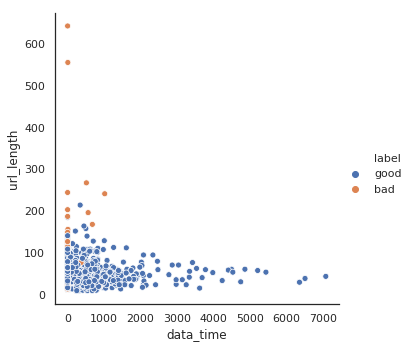

In [40]:
sns.relplot(y="url_length", x='data_time',hue="label", data=data,height=5,aspect=1)


In [41]:
temp  = data[data["url_length"]<100]
np.unique(temp["label"],return_counts=True)

(array(['bad', 'good'], dtype=object), array([ 200, 1545]))

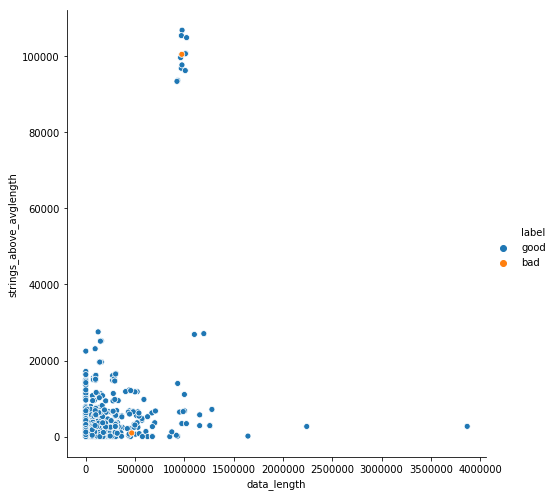

In [8]:
sns.relplot(y="strings_above_avglength", x='data_length',hue="label", data=data,height=7,aspect=1).savefig("saa_dl.png")

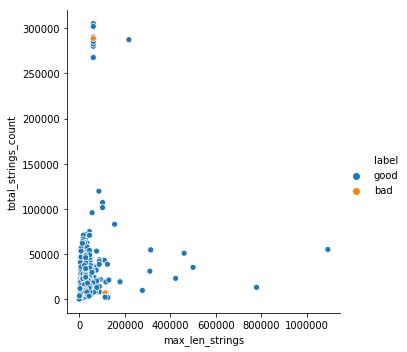

In [10]:
sns.relplot(x="max_len_strings", y='total_strings_count',hue="label", data=data).savefig("tsc_mls.png")

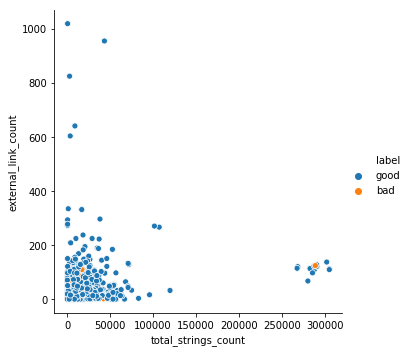

In [13]:
sns.relplot(x="total_strings_count", y='external_link_count',hue="label", data=data).savefig("ic_elc.png")